<a href="https://colab.research.google.com/github/mo-mo-666/qiita-articles-script/blob/master/arcsin-law/arcsin_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# タイトル

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Brownian motion (Wiener process)
___

A 1-dimensional Brownian motion $B(t)$ is a stochastic process satisfying the following four conditions:
1. $B(0) = 0 \,\, a.s.$
1. For any $0 \le s < t$, $B(t) - B(s)$ is normally distributed with mean $0$ and variance $t-s$.
1. $B(t)$ has independent increments.
1. Almost all sample paths of $B(t)$ is continuous.

Let $B_1(t), B_2(t), \dots B_n(t)$ be n independent Brownian motions. A n-dimensional Brownian motion $B(t)$ is the following:
$$B(t) = (B_1(t), B_2(t), \dots , B_n(t)).$$ 

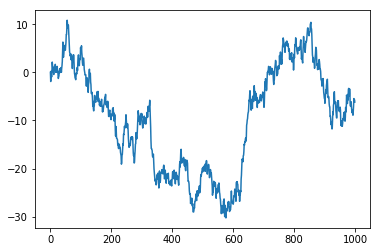

In [15]:
step = 1000

diff = np.random.randn(step).astype(np.float32)
diff[0] = 0
bm = np.cumsum(diff)
plt.plot(bm)
plt.show()

## Arc-sine law of Lévy

**Theorem**  
Let $L_t = \int^t_0 \text{sgn}^+(B(s))\, ds = \int^t_0 1_{\{(B(s)) > 0\}}\, ds $ be the amount of time that a Browinan motion is positive during $[0, t]$. Then,
$$ P(L_t \le \tau)\, = \, \frac{2}{\pi}\arcsin \sqrt{\frac{\tau}{t}}, \,\,\, 0 \le \tau \le t.$$

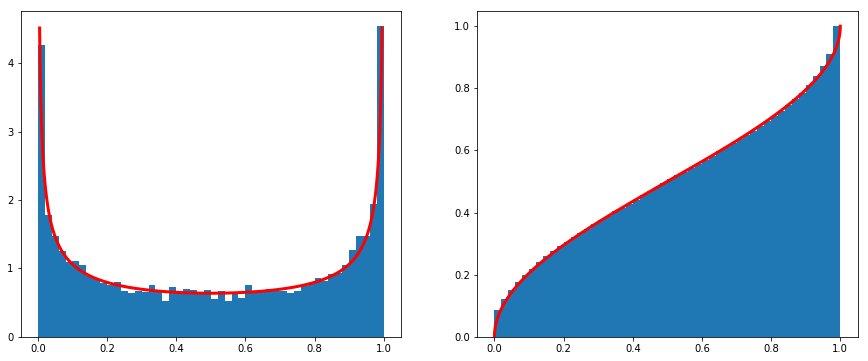

In [25]:
step = 1000
num = 10000

diff = np.random.randn(num, step).astype(np.float32)
diff[0] = 0.
bms = np.cumsum(diff, axis=1)
cal_positive = np.sum(bms > 0, axis=1) / step
x = np.linspace(0.005, 0.995, 9900)
thm_positive = 2 / np.pi * 1 / (2 * np.sqrt(x * (1 - x)))
xd = np.linspace(0, 1, 10000)
thm_dist = (2 / np.pi) * np.arcsin(np.sqrt(xd))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(cal_positive, bins=50, density=True)
plt.plot(x, thm_positive, linewidth=3, color='r')
plt.subplot(1, 2, 2)
plt.hist(cal_positive, bins=50, density=True, cumulative=True)
plt.plot(xd, thm_dist, linewidth=3, color='r')
plt.show()



## Integral of a Brownian motion
A integral of a Brownian motion is normally distributed with mean 0 and variance $\frac{1}{3} t^2$,  i. e., 

$$\int_0^t B(s)\, ds  \sim N\bigg{(} 0,\frac{1}{3}t^2 \bigg{)}. $$

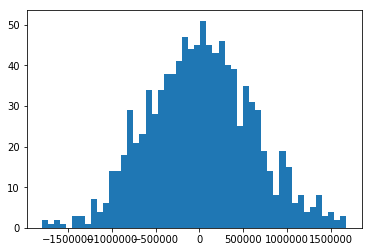

In [0]:
step = 1000
num = 10000

diffs = np.random.randn(num, step).astype(np.float32)
diffs[0] = 0.
bms = np.cumsum(diffs, axis=1)
